In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
genetic = pd.read_csv("matrix_1kg.txt", "\t")
genetic

,CHROM,POS,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,chr21,14347281,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,chr21,14003813,T,C,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,chr21,39261634,T,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,chr21,17793478,A,G,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,chr21,35934376,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,chr21,28142462,A,C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,chr21,17061272,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,chr21,43768467,C,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,chr21,36334991,G,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
genab = genetic.drop(['CHROM', 'POS','REF','ALT'],1)
tot_al = genab.sum(axis=1)

In [4]:
tot_chr = len(genab.columns)*2

In [5]:
allfre = tot_al/tot_chr

<bound method hist_series of 0       0.000392
1       0.019231
2       0.003336
3       0.002159
4       0.000392
          ...   
9995    0.020604
9996    0.000196
9997    0.001374
9998    0.028846
9999    0.002551
Length: 10000, dtype: float64>

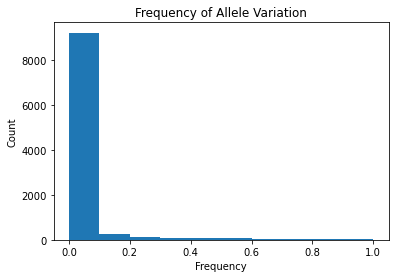

In [6]:
figure, ax = plt.subplots()
ax.hist(allfre)
ax.set_xlabel("Frequency")
ax.set_ylabel("Count")
ax.set_title("Frequency of Allele Variation")
allfre.hist


In [7]:
ComVar0 = (0.95>allfre) & (allfre>0.05)
#print(ComVar0)

CommVar = genab.loc[ComVar0, :]
CommVar



,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,HG00105,HG00106,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
20,0,1,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
32,1,2,1,1,1,1,0,0,0,1,...,1,1,2,0,0,0,1,1,1,0
38,0,1,2,1,1,1,1,1,1,0,...,0,1,0,1,1,1,1,2,0,1
41,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,0,0,0,0,0,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9957,1,2,2,2,2,2,1,2,2,1,...,2,2,2,2,2,2,2,2,1,2
9959,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9974,0,1,1,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
9975,2,1,0,1,0,1,0,1,2,2,...,1,2,2,2,2,1,2,2,2,2


In [8]:
#pca_input = genab.iloc[:, 2:]
#pca_input


In [9]:
genab = genab.T
genab

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
HG00096,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HG00097,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HG00099,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HG00100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HG00101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NA21137,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NA21141,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NA21142,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NA21143,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
genab.mean(axis = 0)

0       0.000785
1       0.038462
2       0.006672
3       0.004317
4       0.000785
          ...   
9995    0.041209
9996    0.000392
9997    0.002747
9998    0.057692
9999    0.005102
Length: 10000, dtype: float64

In [11]:
genab.var(axis = 0)

0       0.000785
1       0.037782
2       0.006630
3       0.004300
4       0.000785
          ...   
9995    0.043452
9996    0.000392
9997    0.002741
9998    0.058311
9999    0.005078
Length: 10000, dtype: float64

In [12]:
genab_standardized = StandardScaler().fit_transform(genab)
genab_standardized.mean(axis = 0)

array([ 2.81174983e-16,  8.04062032e-16, -6.15742413e-16, ...,
       -3.13720792e-16, -1.76030043e-15,  8.90923477e-16])

In [13]:
genab_standardized.var(axis = 0)

array([1., 1., 1., ..., 1., 1., 1.])

In [17]:
genab = PCA(n_components=2)
genab_output = genab.fit_transform(genab_standardized)
genab_output

array([[ -8.33942981, -10.42876982],
       [ -8.46123843, -10.32331709],
       [ -8.29420011,  -9.02378914],
       ...,
       [ -6.33274903,  -3.78074537],
       [ -8.61492143,  -2.74355914],
       [ -6.0796691 ,  -1.78564717]])

In [18]:
genab_output.shape

(2548, 2)

In [19]:
genab_output_df = pd.DataFrame(data = genab_output,
                            columns = ['PC1', 'PC2'])
genab_output_df

,PC1,PC2
0,-8.339430,-10.428770
1,-8.461238,-10.323317
2,-8.294200,-9.023789
3,-7.921072,-9.075274
4,-8.883854,-10.099705
...,...,...
2543,-8.045113,-0.478146
2544,-8.438440,-3.946055
2545,-6.332749,-3.780745
2546,-8.614921,-2.743559


Text(0.5, 1.0, 'Variation of Allele Frequency')

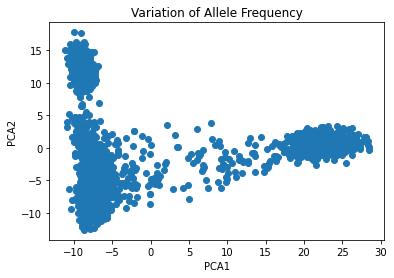

In [21]:
fig, ax = plt.subplots()
ax.scatter(x = genab_output_df['PC1'], y = genab_output_df['PC2'])
ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_title("Variation of Allele Frequency")